In [319]:
#'MetaData
#@Author : Bait Yash Sudhakar
#Date : 28-06-2021

In [320]:
# Importing the necessary libraries

In [321]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd. set_option('display.max_columns', 150) # or 1000.
pd. set_option('display.max_rows', 150) # or 1000.

In [322]:
# Importing the data
df=pd.read_csv(r'C:\Users\yashs\Desktop\HighRadius\H2HBABBA2968.csv')

In [323]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104409,LOB co,2019-09-27 00:00:00,2019.0,2.960579e+09,2019-09-13,20190913,20190913,20190926.0,CAD,RV,1.0,NaN,35895.75,20190916.0,CA10,2.960579e+09,0
1,U001,0200781803,JRD us,2019-08-12 00:00:00,2019.0,1.929653e+09,2019-07-23,20190723,20190723,20190812.0,USD,RV,1.0,NaN,2648.16,20190723.0,NAD1,1.929653e+09,0
2,CA02,0100021489,CHENS E associates,2019-10-18 00:00:00,2019.0,2.960583e+09,2019-09-28,20190928,20190928,20191011.0,CAD,RV,1.0,NaN,3205.87,20191001.0,CA10,2.960583e+09,0
3,U001,0200782001,GORDO llc,2020-02-13 00:00:00,2020.0,1.930452e+09,2020-01-29,20200128,20200129,20200213.0,USD,RV,1.0,NaN,58994.13,20200129.0,NAA8,1.930452e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-10-15 00:00:00,2019.0,1.929942e+09,2019-10-02,20191001,20191002,20191017.0,USD,RV,1.0,NaN,38848.57,20191002.0,NAH4,1.929942e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200729290,KROGER co,2020-01-27 00:00:00,2020.0,1.930384e+09,2020-01-10,20200110,20200110,20200125.0,USD,RV,1.0,NaN,73839.14,20200110.0,NAA8,1.930384e+09,0
49996,U001,0200803720,DEC trust,2019-04-01 00:00:00,2019.0,1.929025e+09,2019-03-25,20190325,20190325,20190408.0,USD,RV,1.0,NaN,6649.34,20190316.0,NAM4,1.929025e+09,0
49997,U001,0200769623,WAL-MAR trust,2020-01-09 00:00:00,2020.0,1.930333e+09,2019-12-30,20191229,20191230,20200114.0,USD,RV,1.0,NaN,38.93,20191230.0,NAH4,1.930333e+09,0
49998,U001,0200769623,WAL-MAR co,2019-06-04 00:00:00,2019.0,1.929360e+09,2019-05-25,20190523,20190525,20190609.0,USD,RV,1.0,NaN,14930.91,20190525.0,NAH4,1.929360e+09,0


In [324]:
# Splitting the data based on the clear_date
main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]

# Data pre-processing

In [325]:
# Converting the below columns to datetime
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'], format='%Y/%m/%d' )
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'], format='%Y%m%d')
main_train['clear_date'] = pd.to_datetime(main_train['clear_date'], format='%Y/%m/%d')
main_train['baseline_create_date']=pd.to_datetime(main_train.baseline_create_date, format='%Y%m%d')
main_train['due_in_date']=pd.to_datetime(main_train.due_in_date, format='%Y%m%d')

In [326]:
# Calculating the delay based upon the simple formula: Delay= clear_date-due_in_date
main_train['Y=Delay'] = main_train['clear_date'] - main_train['due_in_date']

In [327]:
# Converting the datatype of delay column from timedelta to int
main_train['Y=Delay'] = pd.to_numeric(main_train['Y=Delay'].dt.days, downcast='integer')

In [328]:
# Encoding the main features :

from sklearn.preprocessing import LabelEncoder

business_code_encoder = LabelEncoder()
business_code_encoder.fit(main_train['business_code'])
main_train['business_code_enc'] = business_code_encoder.transform(main_train['business_code'])

document_type_encoder = LabelEncoder()
document_type_encoder.fit(main_train['document type'])
main_train['document_type_enc'] = document_type_encoder.transform(main_train['document type'])


cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(main_train['cust_number'])
main_train['cust_number_enc'] = cust_number_encoder.transform(main_train['cust_number'])

name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(main_train['name_customer'])
main_train['name_customer_enc'] = name_customer_encoder.transform(main_train['name_customer'])

clear_date_encoder = LabelEncoder()
clear_date_encoder.fit(main_train['clear_date'])
main_train['clear_date_enc'] = clear_date_encoder.transform(main_train['clear_date'])

buisness_year_encoder = LabelEncoder()
buisness_year_encoder.fit(main_train['buisness_year'])
main_train['buisness_year_enc'] = buisness_year_encoder.transform(main_train['buisness_year'])

doc_id_encoder = LabelEncoder()
doc_id_encoder.fit(main_train['doc_id'])
main_train['doc_id_enc'] = doc_id_encoder.transform(main_train['doc_id'])

posting_date_encoder = LabelEncoder()
posting_date_encoder.fit(main_train['posting_date'])
main_train['posting_date_enc'] = posting_date_encoder.transform(main_train['posting_date'])

document_create_date_encoder = LabelEncoder()
document_create_date_encoder.fit(main_train['document_create_date'])
main_train['document_create_date_enc'] = document_create_date_encoder.transform(main_train['document_create_date'])

document_create_date1_encoder = LabelEncoder()
document_create_date1_encoder.fit(main_train['document_create_date.1'])
main_train['document_create_date.1_enc'] = document_create_date1_encoder.transform(main_train['document_create_date.1'])

due_in_date_encoder = LabelEncoder()
due_in_date_encoder.fit(main_train['due_in_date'])
main_train['due_in_date_enc'] = due_in_date_encoder.transform(main_train['due_in_date'])

invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(main_train['invoice_currency'])
main_train['invoice_currency_enc'] = invoice_currency_encoder.transform(main_train['invoice_currency'])

total_open_amount_encoder = LabelEncoder()
total_open_amount_encoder.fit(main_train['total_open_amount'])
main_train['total_open_amount_enc'] = total_open_amount_encoder.transform(main_train['total_open_amount'])

document_create_date_encoder = LabelEncoder()
document_create_date_encoder.fit(main_train['document_create_date'])
main_train['document_create_date_enc'] = document_create_date_encoder.transform(main_train['document_create_date'])

baseline_create_date_encoder = LabelEncoder()
baseline_create_date_encoder.fit(main_train['baseline_create_date'])
main_train['baseline_create_date_enc'] = baseline_create_date_encoder.transform(main_train['baseline_create_date'])

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(main_train['cust_payment_terms'])
main_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(main_train['cust_payment_terms'])

invoice_id_encoder = LabelEncoder()
invoice_id_encoder.fit(main_train['invoice_id'])
main_train['invoice_id_enc'] = invoice_id_encoder.transform(main_train['invoice_id'])


In [329]:
main_train.shape

(40000, 36)

In [330]:
# dropping columns  document type', 'area_business', 'document_create_date.1' 
# Here we also know that isOpen and posting_id are constant columns
main_train.drop(columns=['area_business', 'posting_id', 'isOpen', 'business_code', 'cust_number', 'name_customer',
                         'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
                         'document_create_date.1', 'due_in_date', 'invoice_currency', 'total_open_amount',
                         'document_create_date', 'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'document type',
                         'clear_date_enc'
                        ], inplace=True)

In [331]:
main_train = main_train.sort_values(by="posting_date_enc")
main_train.reset_index(inplace=True, drop=True)

In [332]:
# Splitting the main_train dataframe into two parts: X and Y
# Here, X=main_train without the target column i.e Y=Delay
# and y= the target column of the main_train dataframe
X=main_train.drop('Y=Delay', axis=1)
y=main_train['Y=Delay']

In [333]:
# splitting the data with 30% of the data going to the intermediate test dataset 
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [334]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [335]:
# Checking the shapes of all three, X_train, X_val and X_test
X_train.shape , X_val.shape , X_test.shape

((28000, 15), (6000, 15), (6000, 15))

# That's all for Milestone1

# Milestone 2 Beginning

# Exploratory data analysis

<AxesSubplot:xlabel='Y=Delay', ylabel='Density'>

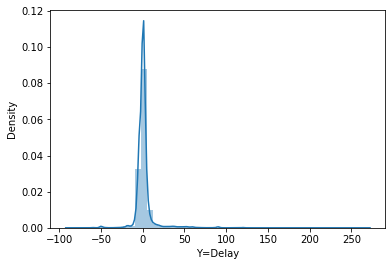

In [336]:
sns.distplot(y_train)

In [337]:
# The distribution is positively skewed or right skewed
# mean>median>mode

In [338]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   business_code_enc           28000 non-null  int32
 1   document_type_enc           28000 non-null  int32
 2   cust_number_enc             28000 non-null  int32
 3   name_customer_enc           28000 non-null  int32
 4   buisness_year_enc           28000 non-null  int64
 5   doc_id_enc                  28000 non-null  int64
 6   posting_date_enc            28000 non-null  int64
 7   document_create_date_enc    28000 non-null  int64
 8   document_create_date.1_enc  28000 non-null  int64
 9   due_in_date_enc             28000 non-null  int64
 10  invoice_currency_enc        28000 non-null  int32
 11  total_open_amount_enc       28000 non-null  int64
 12  baseline_create_date_enc    28000 non-null  int64
 13  cust_payment_terms_enc      28000 non-null  int32
 14  invoic

In [339]:
X_train

,business_code_enc,document_type_enc,cust_number_enc,name_customer_enc,buisness_year_enc,doc_id_enc,posting_date_enc,document_create_date_enc,document_create_date.1_enc,due_in_date_enc,invoice_currency_enc,total_open_amount_enc,baseline_create_date_enc,cust_payment_terms_enc,invoice_id_enc
0,1,0,843,3712,0,61,0,0,0,14,1,30472,3,38,61
1,1,0,843,3719,0,87,0,0,0,14,1,30821,3,38,87
2,1,0,843,3713,0,51,0,0,0,14,1,21894,3,38,51
3,1,0,869,438,0,81,0,1,0,14,1,33575,3,23,81
4,1,0,843,3720,0,106,0,1,0,14,1,11871,3,38,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1,0,848,3762,0,24647,282,282,282,296,1,30753,285,23,24647
27996,1,0,589,534,0,24180,282,277,282,296,1,3892,285,29,24180
27997,1,0,787,3464,0,24642,282,282,282,296,1,10273,285,23,24642
27998,1,0,993,2905,0,24671,282,282,282,313,1,3153,285,15,24671


In [340]:
y_train

0        -5
1        -5
2         3
3         2
4        -5
         ..
27995     0
27996     1
27997     1
27998   -17
27999     5
Name: Y=Delay, Length: 28000, dtype: int16

In [341]:
# Checking out the heatmap for correlation :

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

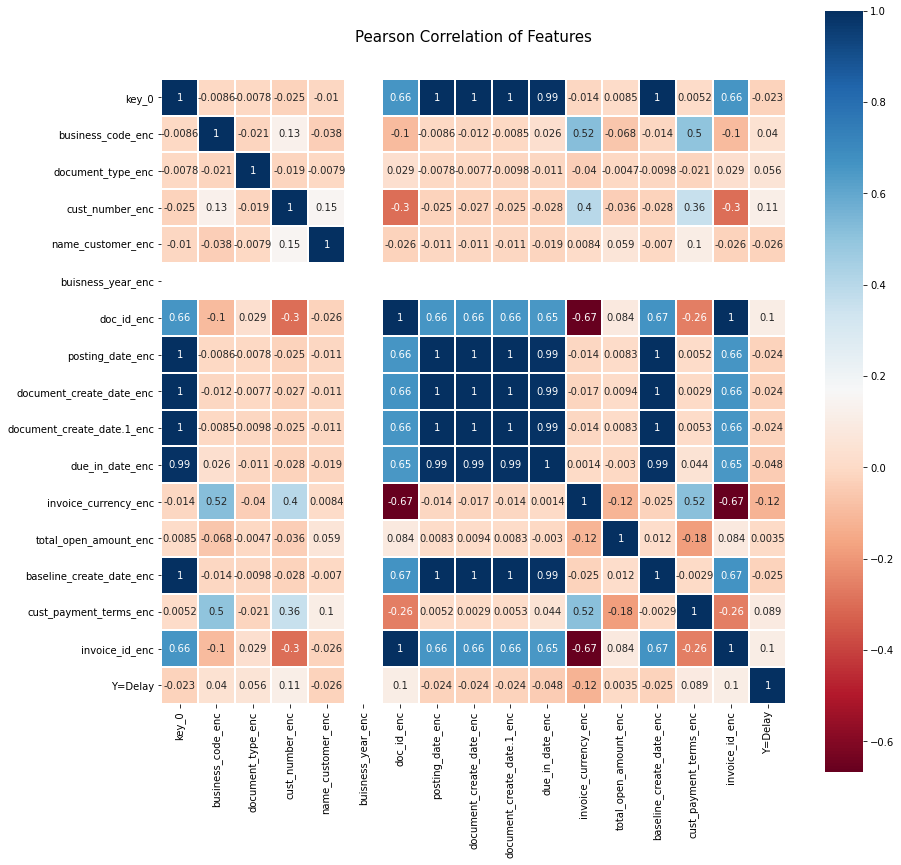

In [342]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [343]:
# Since posting date has correlation=1 with document_create_date_enc and document_create_date1_enc
# we can drop the other two

In [344]:
# Feature selection and feature engineering

In [345]:
X_train.drop(columns=['document_create_date_enc', 'document_create_date.1_enc', 'baseline_create_date_enc'], inplace=True)
X_val.drop(columns=['document_create_date_enc', 'document_create_date.1_enc', 'baseline_create_date_enc'], inplace=True)
X_test.drop(columns=['document_create_date_enc', 'document_create_date.1_enc', 'baseline_create_date_enc'], inplace=True)

# Beginning with milestone3

# Modelling

In [346]:
# Training the model using Linear regression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [347]:
y_predict = base_model.predict(X_val)

In [348]:
# Comparing the predicted values and actual values side by side
comp_res=tuple(zip(y_train, y_predict))
comp_res

((-5, 4.456483530577835),
 (-5, -1.6320383618299976),
 (3, -4.925457121077641),
 (2, 0.1873026942324154),
 (-5, -1.8322051904017647),
 (1, 1.213213292047464),
 (8, -1.824362786958118),
 (-4, 1.2425252387716563),
 (1, 1.251685122386868),
 (26, 15.878416196740936),
 (1, 4.578100117158308),
 (-5, -1.0955800994943123),
 (-3, 1.9373826778015593),
 (-5, 1.3651412959892477),
 (1, 1.6735021345844396),
 (1, -1.6367091591192766),
 (1, -0.4538108393448672),
 (0, -6.967174005687439),
 (1, 6.932434474818472),
 (-5, 1.199958284758929),
 (0, 5.409861831836218),
 (-5, 1.273046249315109),
 (-5, -4.998634550100248),
 (1, 1.2420085750587413),
 (8, 15.81374349147466),
 (-5, 1.2179687763224019),
 (-4, 1.1722113519931776),
 (-5, -4.313910870585835),
 (-7, 15.610596563466636),
 (1, -0.1198005093857395),
 (0, 1.2653471427862195),
 (1, -1.8523339446343945),
 (0, -1.1127747673664024),
 (1, 1.8846291927514338),
 (-5, 1.183402009624836),
 (-5, -0.11425344279920946),
 (0, 1.217175207155372),
 (0, 1.219513178901245

In [349]:
# Calculating the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

6.4011992332721706

In [350]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [351]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

In [352]:
# Tree based approach
# Training the model using the decision tree approach

In [353]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [354]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [355]:
y_predict2 = regressor.predict(X_val)

In [356]:
mean_squared_error(y_val, y_predict2, squared=False)  #################################################################

5.644581096063163

In [357]:
# Doing a prediction on X_test
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

7.900642781255784

In [358]:
# Comparing the predicted y_test values and the actual y_test values side by side
comp_res=tuple(zip(y_test, y_predict_test))
comp_res

((5, 0.8808113194396041),
 (-3, -1.9219057483169342),
 (-2, 0.8808113194396041),
 (-3, -1.9219057483169342),
 (-8, -1.9219057483169342),
 (0, 0.8808113194396041),
 (1, 0.8808113194396041),
 (1, 0.8808113194396041),
 (-3, -1.9219057483169342),
 (-2, -1.9219057483169342),
 (-1, 3.648825778263244),
 (1, 0.8808113194396041),
 (-2, 0.8808113194396041),
 (9, 3.648825778263244),
 (0, 0.8808113194396041),
 (0, 0.8808113194396041),
 (1, 0.8808113194396041),
 (1, 0.8808113194396041),
 (0, 0.8808113194396041),
 (-8, -1.9219057483169342),
 (0, 0.8808113194396041),
 (1, -1.9219057483169342),
 (-3, -1.9219057483169342),
 (-3, -1.9219057483169342),
 (8, 16.543147208121827),
 (0, 3.648825778263244),
 (-3, -1.9219057483169342),
 (4, 0.8808113194396041),
 (0, 0.8808113194396041),
 (1, 0.8808113194396041),
 (-3, -1.9219057483169342),
 (0, 0.8808113194396041),
 (1, 0.8808113194396041),
 (-3, -1.9219057483169342),
 (0, 0.8808113194396041),
 (1, 0.8808113194396041),
 (4, 0.8808113194396041),
 (-3, -1.921905

In [359]:
# Doing a prediction on X_val
y_predict_val = regressor.predict(X_val)
mean_squared_error(y_val, y_predict_val, squared=False)

5.644581096063163

In [360]:
# Comparing the predicted y_val values and the actual y_val values side by side
comp_res=tuple(zip(y_val, y_predict_val))
comp_res

((2, 3.648825778263244),
 (0, 0.8808113194396041),
 (-19, 0.8808113194396041),
 (9, 0.8808113194396041),
 (5, 0.8808113194396041),
 (-2, -1.9219057483169342),
 (1, 0.8808113194396041),
 (1, -1.9219057483169342),
 (-2, -1.9219057483169342),
 (50, 44.677215189873415),
 (2, 3.648825778263244),
 (0, 0.8808113194396041),
 (2, -1.9219057483169342),
 (-1, 0.8808113194396041),
 (0, 0.8808113194396041),
 (7, 0.8808113194396041),
 (2, 0.8808113194396041),
 (-16, 0.8808113194396041),
 (-1, -1.9219057483169342),
 (-2, -1.9219057483169342),
 (0, 3.648825778263244),
 (-5, -1.9219057483169342),
 (1, 0.8808113194396041),
 (-5, -1.9219057483169342),
 (50, 44.677215189873415),
 (-5, -1.9219057483169342),
 (15, 8.452755905511811),
 (-27, -1.9219057483169342),
 (8, -1.9219057483169342),
 (0, 0.8808113194396041),
 (-5, -1.9219057483169342),
 (6, 0.8808113194396041),
 (0, 0.8808113194396041),
 (0, 0.8808113194396041),
 (7, -1.9219057483169342),
 (-1, 0.8808113194396041),
 (-3, -1.9219057483169342),
 (1, -1.

In [361]:
# Making a copy of the main_test
X_main_test=main_test.copy(deep=True)

In [362]:
# Converting the below columns to datetime
X_main_test['posting_date'] = pd.to_datetime(X_main_test['posting_date'], format='%Y/%m/%d' )
X_main_test['document_create_date'] = pd.to_datetime(X_main_test['document_create_date'], format='%Y%m%d')
X_main_test['clear_date'] = pd.to_datetime(X_main_test['clear_date'], format='%Y/%m/%d')
X_main_test['baseline_create_date']=pd.to_datetime(X_main_test.baseline_create_date, format='%Y%m%d')
X_main_test['due_in_date']=pd.to_datetime(X_main_test.due_in_date, format='%Y%m%d')

main_test['posting_date'] = pd.to_datetime(main_test['posting_date'], format='%Y/%m/%d' )
main_test['document_create_date'] = pd.to_datetime(main_test['document_create_date'], format='%Y%m%d')
main_test['clear_date'] = pd.to_datetime(main_test['clear_date'], format='%Y/%m/%d')
main_test['baseline_create_date']=pd.to_datetime(main_test.baseline_create_date, format='%Y%m%d')
main_test['due_in_date']=pd.to_datetime(main_test.due_in_date, format='%Y%m%d')



In [363]:
# Encoding the main features of the main_test :
from sklearn.preprocessing import LabelEncoder

business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_main_test['business_code'])
X_main_test['business_code_enc'] = business_code_encoder.transform(X_main_test['business_code'])

cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_main_test['cust_number'])
X_main_test['cust_number_enc'] = cust_number_encoder.transform(X_main_test['cust_number'])

name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_main_test['name_customer'])
X_main_test['name_customer_enc'] = name_customer_encoder.transform(X_main_test['name_customer'])

buisness_year_encoder = LabelEncoder()
buisness_year_encoder.fit(X_main_test['buisness_year'])
X_main_test['buisness_year_enc'] = buisness_year_encoder.transform(X_main_test['buisness_year'])

doc_id_encoder = LabelEncoder()
doc_id_encoder.fit(X_main_test['doc_id'])
X_main_test['doc_id_enc'] = doc_id_encoder.transform(X_main_test['doc_id'])

posting_date_encoder = LabelEncoder()
posting_date_encoder.fit(X_main_test['posting_date'])
X_main_test['posting_date_enc'] = posting_date_encoder.transform(X_main_test['posting_date'])

document_create_date_encoder = LabelEncoder()
document_create_date_encoder.fit(X_main_test['document_create_date'])
X_main_test['document_create_date_enc'] = document_create_date_encoder.transform(X_main_test['document_create_date'])

document_create_date1_encoder = LabelEncoder()
document_create_date1_encoder.fit(X_main_test['document_create_date.1'])
X_main_test['document_create_date.1_enc'] = document_create_date1_encoder.transform(X_main_test['document_create_date.1'])

due_in_date_encoder = LabelEncoder()
due_in_date_encoder.fit(X_main_test['due_in_date'])
X_main_test['due_in_date_enc'] = due_in_date_encoder.transform(X_main_test['due_in_date'])

invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_main_test['invoice_currency'])
X_main_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_main_test['invoice_currency'])

document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_main_test['document type'])
X_main_test['document_type_enc'] = document_type_encoder.transform(X_main_test['document type'])

posting_id_encoder = LabelEncoder()
posting_id_encoder.fit(X_main_test['posting_id'])
X_main_test['posting_id_enc'] = posting_id_encoder.transform(X_main_test['posting_id'])


total_open_amount_encoder = LabelEncoder()
total_open_amount_encoder.fit(X_main_test['total_open_amount'])
X_main_test['total_open_amount_enc'] = total_open_amount_encoder.transform(X_main_test['total_open_amount'])

baseline_create_date_encoder = LabelEncoder()
baseline_create_date_encoder.fit(X_main_test['baseline_create_date'])
X_main_test['baseline_create_date_enc'] = baseline_create_date_encoder.transform(X_main_test['baseline_create_date'])

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_main_test['cust_payment_terms'])
X_main_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_main_test['cust_payment_terms'])

invoice_id_encoder = LabelEncoder()
invoice_id_encoder.fit(X_main_test['invoice_id'])
X_main_test['invoice_id_enc'] = invoice_id_encoder.transform(X_main_test['invoice_id'])

isOpen_encoder = LabelEncoder()
isOpen_encoder.fit(X_main_test['isOpen'])
X_main_test['isOpen_enc'] = isOpen_encoder.transform(X_main_test['isOpen'])



In [364]:
# dropping columns  document type', 'area_business', 'document_create_date.1' 
# Here we also know that isOpen and posting_id are constant columns
X_main_test.drop(columns=['area_business', 'posting_id', 'isOpen', 'business_code', 'cust_number', 'name_customer',
                         'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
                         'document_create_date.1', 'due_in_date', 'invoice_currency', 'total_open_amount',
                         'document_create_date', 'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'document type',
                        'document_create_date_enc', 'document_create_date.1_enc', 'posting_id_enc', 'baseline_create_date_enc',
                        'isOpen_enc'
                        
                       ], inplace=True)

In [365]:
# Calculating the final results
final_result = regressor.predict(X_main_test)

In [366]:
final_result = pd.Series(final_result,name='Y=Delay')

In [367]:
# resetting the index of main test so that we can merge price series with it
main_test.reset_index(drop=True,inplace=True)

In [368]:
# Creating the Final dataframe
Final = main_test.merge(final_result , on = main_test.index )
Final['Y=Delay'] = Final['Y=Delay'].astype(int)
Final 

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Y=Delay
0,0,U001,0200726979,BJ'S associates,NaT,2020.0,1.930732e+09,2020-04-02,2020-04-01,20200402,2020-04-17,USD,RV,1.0,NaN,388.76,2020-04-02,NAA8,1.930732e+09,1,0
1,1,U001,0200744019,TARG systems,NaT,2020.0,1.930800e+09,2020-04-18,2020-04-18,20200418,2020-05-03,USD,RV,1.0,NaN,3856.49,2020-04-18,NAA8,1.930800e+09,1,19
2,2,U001,0200726979,BJ'S trust,NaT,2020.0,1.930585e+09,2020-03-01,2020-02-29,20200301,2020-03-16,USD,RV,1.0,NaN,163.80,2020-03-01,NAA8,1.930585e+09,1,0
3,3,U001,0200799538,UNITE associates,NaT,2020.0,1.930700e+09,2020-03-25,2020-03-25,20200325,2020-04-09,USD,RV,1.0,NaN,80623.49,2020-03-25,NAA8,1.930700e+09,1,12
4,4,U001,0200762301,C&S WH systems,NaT,2020.0,1.930876e+09,2020-05-07,2020-05-07,20200507,2020-05-22,USD,RV,1.0,NaN,121341.58,2020-05-07,NAC6,1.930876e+09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,0200700919,US corp,NaT,2020.0,1.930804e+09,2020-04-20,2020-04-20,20200420,2020-05-05,USD,RV,1.0,NaN,20400.14,2020-04-20,NAA8,1.930804e+09,1,12
9996,9996,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930783e+09,2020-04-15,2020-04-14,20200415,2020-04-30,USD,RV,1.0,NaN,27285.56,2020-04-15,NAH4,1.930783e+09,1,12
9997,9997,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930694e+09,2020-03-27,2020-03-25,20200327,2020-04-11,USD,RV,1.0,NaN,15465.22,2020-03-27,NAH4,1.930694e+09,1,19
9998,9998,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930634e+09,2020-03-10,2020-03-10,20200310,2020-03-25,USD,RV,1.0,NaN,1232.98,2020-03-10,NAH4,1.930634e+09,1,19


In [369]:
# Calculating the clear_date using a simple formula : clear_date= due_in_date-Delay
Final['clear_date']=Final['due_in_date']+ pd.to_timedelta(Final['Y=Delay'], unit='d')
Final[['clear_date', 'due_in_date', 'Y=Delay']]

,clear_date,due_in_date,Y=Delay
0,2020-04-17,2020-04-17,0
1,2020-05-22,2020-05-03,19
2,2020-03-16,2020-03-16,0
3,2020-04-21,2020-04-09,12
4,2020-05-22,2020-05-22,0
...,...,...,...
9995,2020-05-17,2020-05-05,12
9996,2020-05-12,2020-04-30,12
9997,2020-04-30,2020-04-11,19
9998,2020-04-13,2020-03-25,19


In [370]:
# Displaying the final table with the predicted delay column and the calculated clear_date column from the predicted delay
# and the already existing due_in_date
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Y=Delay
0,0,U001,0200726979,BJ'S associates,2020-04-17,2020.0,1.930732e+09,2020-04-02,2020-04-01,20200402,2020-04-17,USD,RV,1.0,NaN,388.76,2020-04-02,NAA8,1.930732e+09,1,0
1,1,U001,0200744019,TARG systems,2020-05-22,2020.0,1.930800e+09,2020-04-18,2020-04-18,20200418,2020-05-03,USD,RV,1.0,NaN,3856.49,2020-04-18,NAA8,1.930800e+09,1,19
2,2,U001,0200726979,BJ'S trust,2020-03-16,2020.0,1.930585e+09,2020-03-01,2020-02-29,20200301,2020-03-16,USD,RV,1.0,NaN,163.80,2020-03-01,NAA8,1.930585e+09,1,0
3,3,U001,0200799538,UNITE associates,2020-04-21,2020.0,1.930700e+09,2020-03-25,2020-03-25,20200325,2020-04-09,USD,RV,1.0,NaN,80623.49,2020-03-25,NAA8,1.930700e+09,1,12
4,4,U001,0200762301,C&S WH systems,2020-05-22,2020.0,1.930876e+09,2020-05-07,2020-05-07,20200507,2020-05-22,USD,RV,1.0,NaN,121341.58,2020-05-07,NAC6,1.930876e+09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,0200700919,US corp,2020-05-17,2020.0,1.930804e+09,2020-04-20,2020-04-20,20200420,2020-05-05,USD,RV,1.0,NaN,20400.14,2020-04-20,NAA8,1.930804e+09,1,12
9996,9996,U001,0200769623,WAL-MAR in,2020-05-12,2020.0,1.930783e+09,2020-04-15,2020-04-14,20200415,2020-04-30,USD,RV,1.0,NaN,27285.56,2020-04-15,NAH4,1.930783e+09,1,12
9997,9997,U001,0200769623,WAL-MAR corp,2020-04-30,2020.0,1.930694e+09,2020-03-27,2020-03-25,20200327,2020-04-11,USD,RV,1.0,NaN,15465.22,2020-03-27,NAH4,1.930694e+09,1,19
9998,9998,U001,0200769623,WAL-MAR llc,2020-04-13,2020.0,1.930634e+09,2020-03-10,2020-03-10,20200310,2020-03-25,USD,RV,1.0,NaN,1232.98,2020-03-10,NAH4,1.930634e+09,1,19


In [371]:
# Bucketing the values of the delay column into categories of 10 units for displaying the range in which the delay lies
lower_limit=((Final['Y=Delay']//10)*10).min()
upper_limit=((Final['Y=Delay']//10+1)*10).max()

bins = np.arange(lower_limit,upper_limit+10,10)
labels = [f'{int(i)} days-{int(j)} days' for i, j in zip(bins[:-1], bins[1:])] 

Final['Delay_Range'] = pd.cut(Final['Y=Delay'], bins=bins, labels=labels, right=False)
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Y=Delay,Delay_Range
0,0,U001,0200726979,BJ'S associates,2020-04-17,2020.0,1.930732e+09,2020-04-02,2020-04-01,20200402,2020-04-17,USD,RV,1.0,NaN,388.76,2020-04-02,NAA8,1.930732e+09,1,0,0 days-10 days
1,1,U001,0200744019,TARG systems,2020-05-22,2020.0,1.930800e+09,2020-04-18,2020-04-18,20200418,2020-05-03,USD,RV,1.0,NaN,3856.49,2020-04-18,NAA8,1.930800e+09,1,19,10 days-20 days
2,2,U001,0200726979,BJ'S trust,2020-03-16,2020.0,1.930585e+09,2020-03-01,2020-02-29,20200301,2020-03-16,USD,RV,1.0,NaN,163.80,2020-03-01,NAA8,1.930585e+09,1,0,0 days-10 days
3,3,U001,0200799538,UNITE associates,2020-04-21,2020.0,1.930700e+09,2020-03-25,2020-03-25,20200325,2020-04-09,USD,RV,1.0,NaN,80623.49,2020-03-25,NAA8,1.930700e+09,1,12,10 days-20 days
4,4,U001,0200762301,C&S WH systems,2020-05-22,2020.0,1.930876e+09,2020-05-07,2020-05-07,20200507,2020-05-22,USD,RV,1.0,NaN,121341.58,2020-05-07,NAC6,1.930876e+09,1,0,0 days-10 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,0200700919,US corp,2020-05-17,2020.0,1.930804e+09,2020-04-20,2020-04-20,20200420,2020-05-05,USD,RV,1.0,NaN,20400.14,2020-04-20,NAA8,1.930804e+09,1,12,10 days-20 days
9996,9996,U001,0200769623,WAL-MAR in,2020-05-12,2020.0,1.930783e+09,2020-04-15,2020-04-14,20200415,2020-04-30,USD,RV,1.0,NaN,27285.56,2020-04-15,NAH4,1.930783e+09,1,12,10 days-20 days
9997,9997,U001,0200769623,WAL-MAR corp,2020-04-30,2020.0,1.930694e+09,2020-03-27,2020-03-25,20200327,2020-04-11,USD,RV,1.0,NaN,15465.22,2020-03-27,NAH4,1.930694e+09,1,19,10 days-20 days
9998,9998,U001,0200769623,WAL-MAR llc,2020-04-13,2020.0,1.930634e+09,2020-03-10,2020-03-10,20200310,2020-03-25,USD,RV,1.0,NaN,1232.98,2020-03-10,NAH4,1.930634e+09,1,19,10 days-20 days


In [374]:
Final.to_csv('predicted_values2.csv', header=True, index=False)